In [1]:
pwd

'/Users/surajpawar/Desktop/Medican Insurance Prediction using machine learning'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/Users/surajpawar/Desktop/Medican Insurance Prediction using machine learning/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


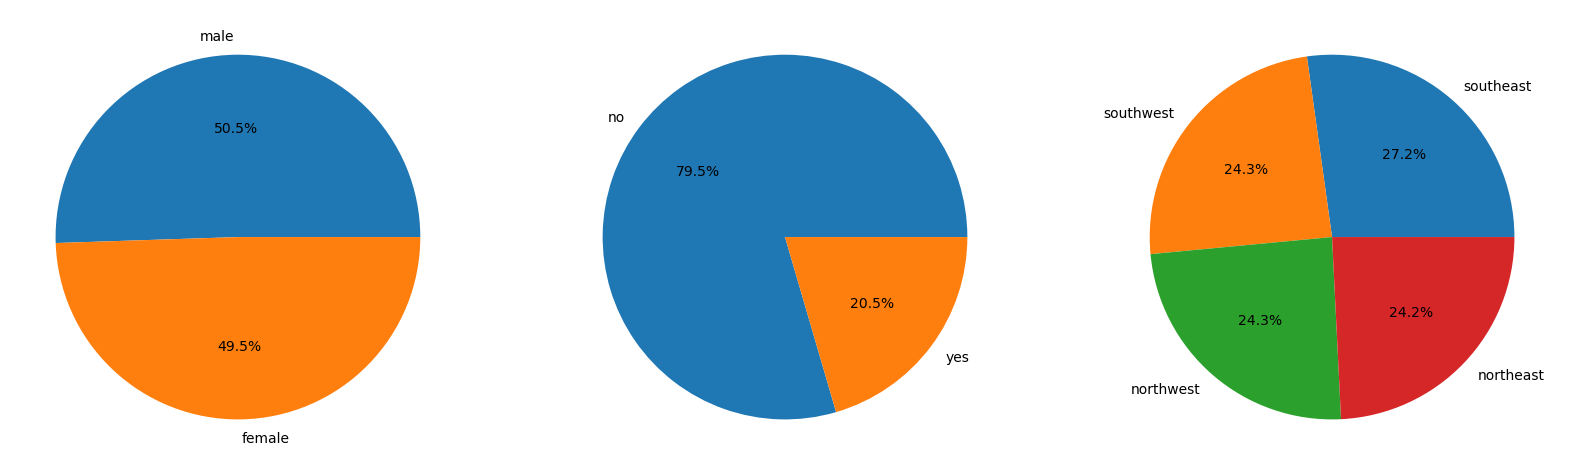

In [9]:
features = ["sex", "smoker", "region"]

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(1,3, i+1)
    
    x = df[col].value_counts()
    plt.pie(x.values, labels=x.index, autopct='%1.1f%%')
    
plt.show()

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


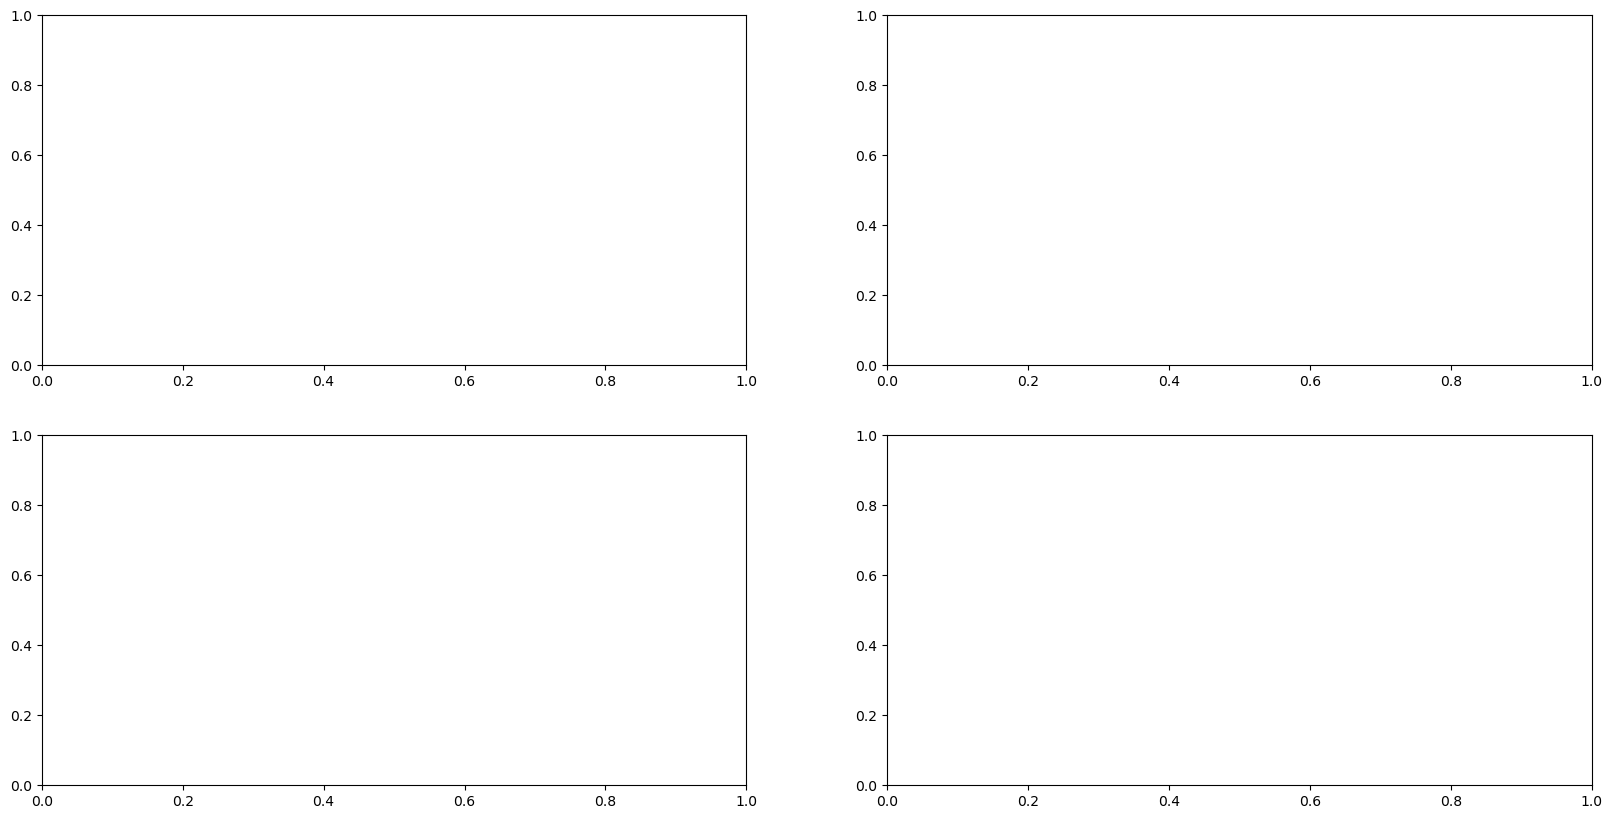

In [11]:
features = ["sex", "children", "smoker", "region"]

plt.subplots(figsize = (20,10))
for i,col in enumerate(features):
    plt.subplot(2,2,i+1)
    df.groupby(col).mean()["charges"].plot.bar
plt.show()

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


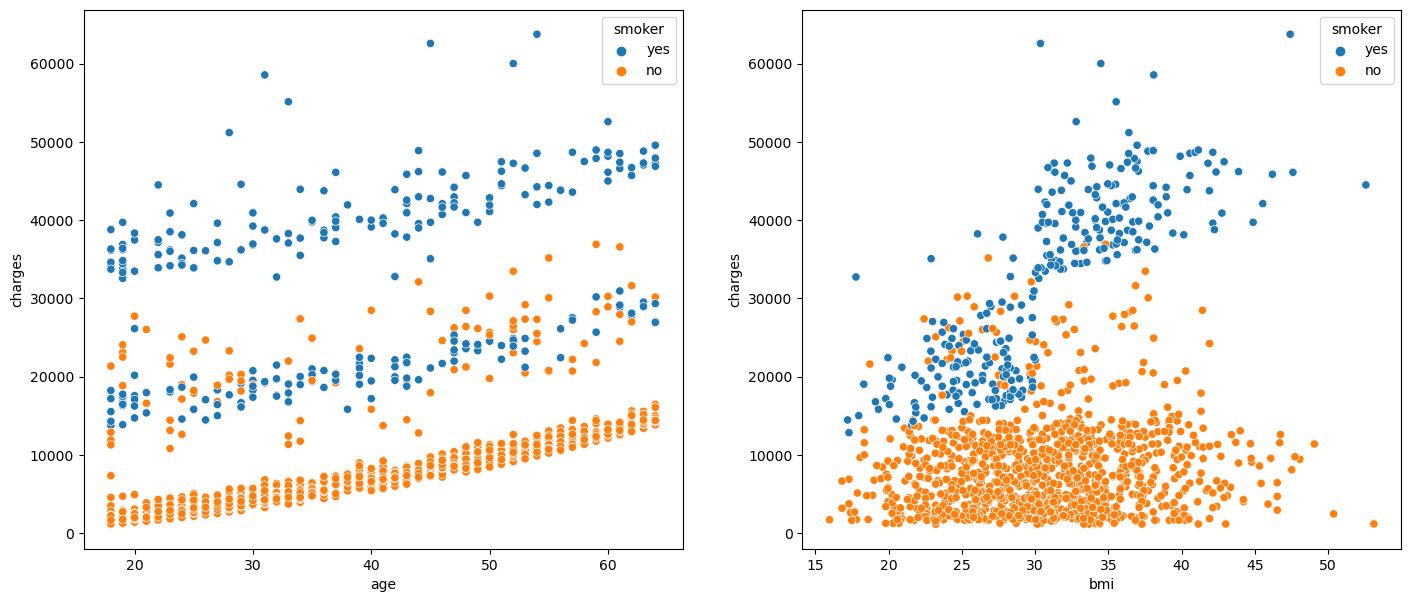

In [15]:
features = ["age", 'bmi']

plt.subplots(figsize=(17,7))
for i, col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df, x=col, y="charges", hue="smoker")
plt.show()

<Axes: >

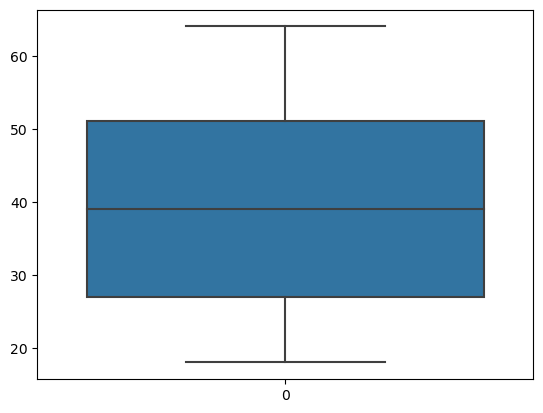

In [16]:
df.drop_duplicates(inplace=True)
sns.boxplot(df["age"])

<Axes: >

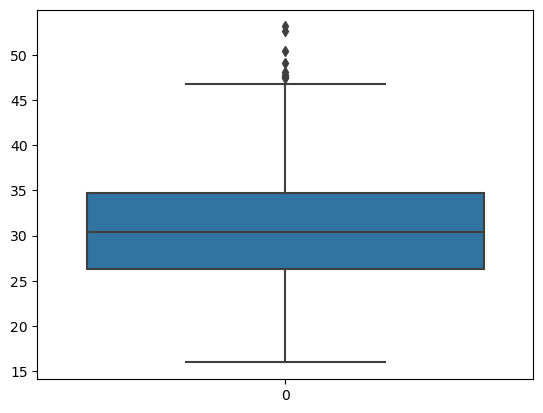

In [17]:
sns.boxplot(df["bmi"])

In [18]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


13.674999999999994
47.31500000000001


In [20]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 3.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


<Axes: >

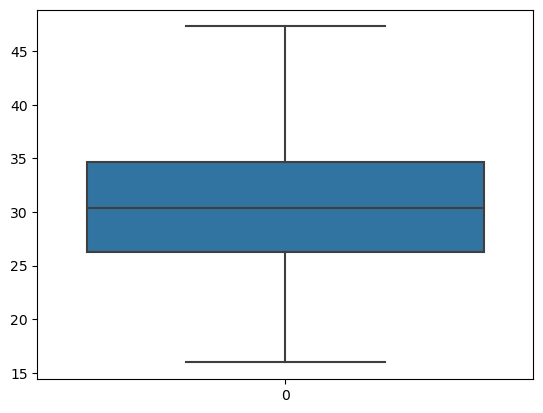

In [19]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])


In [20]:
df["bmi"].skew()


0.23289153320569975

In [21]:
df["age"].skew()

0.054780773126998195

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df["sex"]=df["sex"].map({'male':0, 'female':1})
df["smoker"]=df["smoker"].map({'yes':1, 'no':0})
df["region"]=df["region"].map({'northwest':0, 'northeast':1, 'southeast':2, 'southwest':3})

In [24]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [25]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.111998,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.044831,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.111998,-0.044831,1.000000,0.013692,0.003151,0.156937,0.199063
children,0.041536,-0.017848,0.013692,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003151,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156937,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.199063,0.067389,0.787234,0.010767,1.000000


In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [29]:
X = df.drop(["charges"],axis=1)
Y = df["charges"]
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1 = []
l2 = []
l3 = []
cvs=0
for i in range(40,50):
    xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2, random_state = i)
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain, ytrain)
    l1.append(lrmodel.score(xtrain, ytrain))
    l2.append(lrmodel.score(xtest, ytest))
    cvs=(cross_val_score(lrmodel, X,Y, cv=5,)).mean()
    l3.append(cvs)
df1 = pd.DataFrame({'train acc':l1, 'test_acc':l2, 'cvs':l3})
df1

,train acc,test_acc,cvs
0,0.741659,0.778409,0.74707
1,0.756401,0.706267,0.74707
2,0.729542,0.806239,0.74707
3,0.754260,0.732791,0.74707
4,0.742966,0.779591,0.74707
5,0.753281,0.731769,0.74707
6,0.741261,0.776456,0.74707
7,0.731940,0.796173,0.74707
8,0.751915,0.741742,0.74707
9,0.756348,0.722565,0.74707


In [32]:
xtrain, xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.2, random_state=42)
lrmodel = LinearRegression()
lrmodel.fit(xtrain,ytrain)
print(lrmodel.score(xtrain, ytrain))
print(lrmodel.score(xtest, ytest))
print(cross_val_score(lrmodel, X, Y, cv=5,).mean())

0.7295415541376445
0.806239111557059
0.7470697972809902


In [33]:
from sklearn.metrics import r2_score
svrmodel = SVR()
svrmodel.fit(xtrain, ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain1))
print(r2_score(ytest, ypredtest1))
print(cross_val_score(svrmodel, X, Y, cv=5).mean())

-0.10151474302536445
-0.1344454720199666
-0.10374591327267262


In [35]:
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain, ytrain)
ypredtrain2=rfmodel.predict(xtrain)
ypredtest2=rfmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel, X, Y, cv=5,).mean())
from sklearn.model_selection import GridSearchCV
estimator = RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid = GridSearchCV(estimator, param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain)
print(grid.best_params_)
rfmodel = RandomForestRegressor(random_state=42, n_estimators=120)
rfmodel.fit(xtrain, ytrain)
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain2))
print(r2_score(ytest, ypredtest2))
print(cross_val_score(rfmodel, X, Y, cv=5,).mean())

0.9738163260247533
0.8819423353068565
0.8363637309718952
{'n_estimators': 120}
0.9746383984429655
0.8822009842175969
0.8367438097052858
